11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8978 - loss: 0.3242 - val_accuracy: 0.9834 - val_loss: 0.0488
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9851 - loss: 0.0484 - val_accuracy: 0.9910 - val_loss: 0.0312
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9914 - val_loss: 0.0295
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9912 - val_loss: 0.0278
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9940 - loss: 0.0179 - val_accuracy: 0.9892 - val_loss: 0.0425
313/313 - 1s - 3ms/step - accuracy: 0.9892 - loss: 0.0425

Test accuracy: 0.9891999959945679


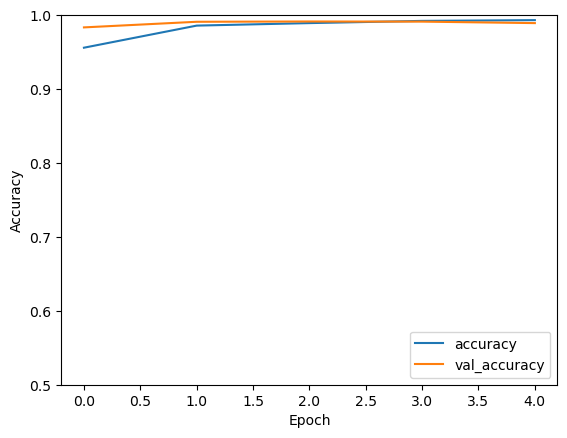

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# MNISTデータセットをロードして、トレーニングデータとテストデータに分割
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# データの前処理：画像を正規化（0-255のピクセル値を0-1の範囲に変換）
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# CNNモデルの構築
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# フラット化して全結合層に接続
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの概要を表示
model.summary()

# モデルのトレーニング
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# モデルの評価
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# トレーニングと検証の精度をプロット
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8912 - loss: 0.3284 - val_accuracy: 0.9813 - val_loss: 0.0558
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9846 - loss: 0.0478 - val_accuracy: 0.9877 - val_loss: 0.0375
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9904 - loss: 0.0321 - val_accuracy: 0.9853 - val_loss: 0.0500
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9889 - val_loss: 0.0386
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9934 - loss: 0.0198 - val_accuracy: 0.9923 - val_loss: 0.0260
Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8733 - loss: 0.4279 - val_accuracy: 0.9632 - val_loss: 0.1221
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.9671 - loss: 0.1087 - val_accuracy: 0.9706 - val_loss: 0.0970
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.9778 - loss: 0.0689 - val_accuracy: 0.9735 - val_loss: 0.0854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9834 - loss: 0.0519 - val_accuracy: 0.9737 - val_loss: 0.0800
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - accuracy: 0.9873 - loss: 0.0402 - val_accuracy: 0.9779 - val_loss: 0.0763
313/313 - 1s - 2ms/step - accuracy: 0.9923 - loss: 0.0260

CNN Test accuracy: 0.9922999739646912
313/313 - 0s - 298us/step - accuracy: 0.9779 - loss: 0.0763

DNN Test accuracy: 0.9779000282287598


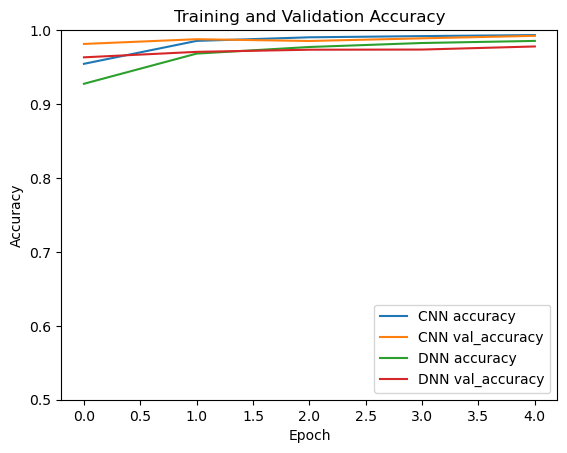

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# MNISTデータセットをロードして、トレーニングデータとテストデータに分割
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# データの前処理：画像を正規化（0-255のピクセル値を0-1の範囲に変換）
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# CNNモデルの構築
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# フラット化して全結合層に接続
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

# CNNモデルのコンパイル
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# CNNモデルのトレーニング
cnn_history = cnn_model.fit(train_images, train_labels, epochs=5, 
                            validation_data=(test_images, test_labels))

# DNNモデルの構築
dnn_model = models.Sequential()
dnn_model.add(layers.Flatten(input_shape=(28, 28, 1)))
dnn_model.add(layers.Dense(128, activation='relu'))
dnn_model.add(layers.Dense(64, activation='relu'))
dnn_model.add(layers.Dense(10, activation='softmax'))

# DNNモデルのコンパイル
dnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# DNNモデルのトレーニング
dnn_history = dnn_model.fit(train_images, train_labels, epochs=5, 
                            validation_data=(test_images, test_labels))

# CNNモデルの評価
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nCNN Test accuracy: {cnn_test_acc}')

# DNNモデルの評価
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nDNN Test accuracy: {dnn_test_acc}')

# トレーニングと検証の精度をプロット
plt.plot(cnn_history.history['accuracy'], label='CNN accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN val_accuracy')
plt.plot(dnn_history.history['accuracy'], label='DNN accuracy')
plt.plot(dnn_history.history['val_accuracy'], label='DNN val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

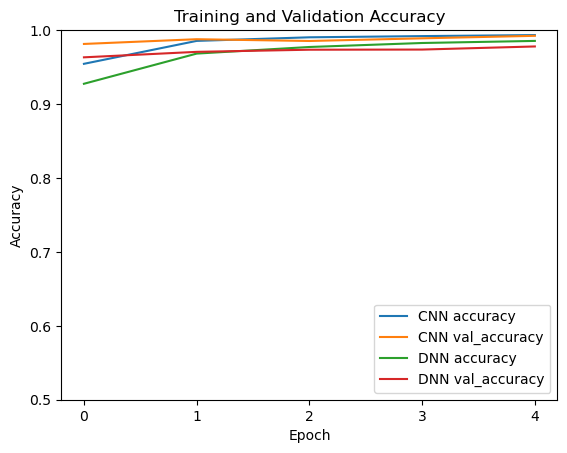

In [4]:
# トレーニングと検証の精度をプロット
plt.plot(cnn_history.history['accuracy'], label='CNN accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN val_accuracy')
plt.plot(dnn_history.history['accuracy'], label='DNN accuracy')
plt.plot(dnn_history.history['val_accuracy'], label='DNN val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.xticks(range(0, 5))
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()